In [1]:
import glob
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

C:\Users\meesa\anaconda3\envs\my3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meesa\anaconda3\envs\my3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meesa\anaconda3\envs\my3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meesa\anaconda3\envs\my3.7\lib\site-packages\tensorflow\python\f

In [2]:
IMG_DIM=[224, 224]

path = 'D:\\TEXTILE\\TRAIN1'
#train_files = [f for f in glob.glob(path + "**/*", recursive=True)]
train_files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        train_files.append(os.path.join(r, file))
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
#print(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]
validation_files = glob.glob('D:\\TEXTILE\\TEST1\\*')
#validatTion_files = glob.glob('C:\\NEW TRAIN & TEST\\TESTWITHOUTZARDOZI\\*')


validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_imgs=preprocess_input(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]
#print(validation_labels)
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)


Train dataset shape: (11993, 224, 224, 3) 	Validation dataset shape: (5142, 224, 224, 3)


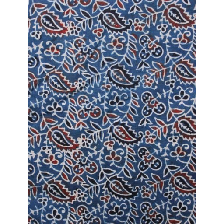

In [3]:
train_imgs_scaled = train_imgs.astype('float32') 
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

# visualize a sample image 
#print(train_imgs[1])
array_to_img(train_imgs[100])

In [4]:
batch_size = 16

num_classes = 8
epochs = 30
#input_shape = (64, 64, 3)
input_shape = (224, 224, 3)

# encode text category labels 
from sklearn.preprocessing import LabelEncoder 
 
le = LabelEncoder() 
le.fit(train_labels) 
train_labels_enc = le.transform(train_labels) 
validation_labels_enc = le.transform(validation_labels) 
 
print(train_labels[0:5], train_labels_enc[0:5])

['ajrakh', 'ajrakh', 'ajrakh', 'ajrakh', 'ajrakh'] [0 0 0 0 0]


In [5]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)


vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()







Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________________

In [8]:
import pandas as pd
pd.set_option('max_colwidth', None)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.topology.InputLayer object at 0x000002B4AA017D88>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000002B4A9ABAA88>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000002B4A9ABA8C8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002B4AA04D9C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002B4AA05A4C8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002B4AA085688>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002B4AA0B66C8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002B4AA0ACC08>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002B4AA0CEA88>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002B4AA0EBE88>,block3_conv3,False


In [6]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


(1, 7, 7, 512)


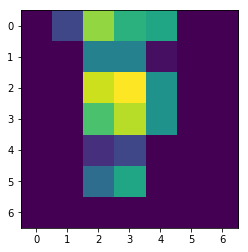

In [7]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [8]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    #x=features.reshape(307,25088)
    return features

In [9]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)

validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)
        
print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (11993, 25088) 	Validation Bottleneck Features: (5142, 25088)


In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
#from keras import optimizers
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
input_shape = vgg_model.output_shape[1]
#input_shape = vgg_model.output_shape[1]

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',  min_delta=0, patience=10, verbose=True)

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
#model.add(Dense(512, activation='relu', input_dim=input_shape))
#model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(4096, activation='relu'))

#model.add(vgg)
#model.add(InputLayer(input_shape=(input_shape,)))
#model.add(Flatten())
#x=Flatten()(vgg.output)
#prediction=Dense(7, activation='softmax')(x)#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Flatten(input_shape=(7,7,512)))

#model.add(Dense(256, activation='relu', input_dim=(7*7*512)))

#model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
#model.layers[0].trainable = False
model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              #loss='binary_crossentropy',
              #optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=opt,
              metrics=['acc'])

#monitor = EarlyStopping(monitor='val_loss', min_delta=le-3, patience=5, verbose=1, restore_best_weights=True, mode='auto')



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 4104      
Total params: 13,112,328
Trainable params: 13,112,328
Non-trainable params: 0
_________________________________________________________________

Instructions f

In [11]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)              
         

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 11993 samples, validate on 5142 samples
Epoch 1/30
11993/11993 [==============================] - 201s - loss: 1.1487 - acc: 0.6054 - val_loss: 1.2444 - val_acc: 0.5972
Epoch 2/30
11993/11993 [==============================] - 198s - loss: 0.7240 - acc: 0.7597 - val_loss: 1.0683 - val_acc: 0.6542
Epoch 3/30
11993/11993 [==============================] - 199s - loss: 0.5603 - acc: 0.8131 - val_loss: 1.0420 - val_acc: 0.6682
Epoch 4/30
11993/11993 [==============================] - 199s - loss: 0.4385 - acc: 0.8547 - val_loss: 1.1482 - val_acc: 0.6733
Epoch 5/30
11993/11993 [==============================] - 201s - loss: 0.3482 - acc: 0.8853 - val_loss: 1.2640 - val_acc: 0.6626
Epoch 6/30
11993/11993 [==============================] - 200s - loss: 0.2733 - acc: 0.9089 - 

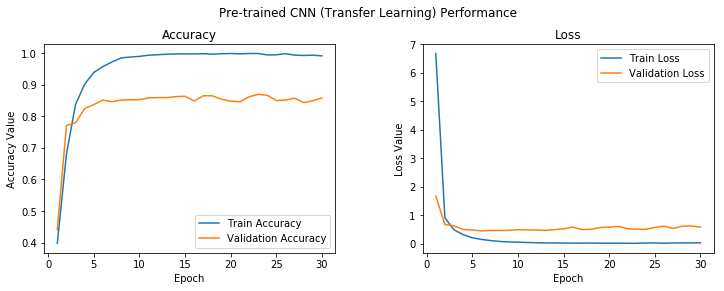

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")